In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size to (12, 6)
plt.rcParams['figure.figsize'] = (12,6)

In [34]:
df = pd.read_csv('train.csv', index_col=0, parse_dates=True)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [35]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


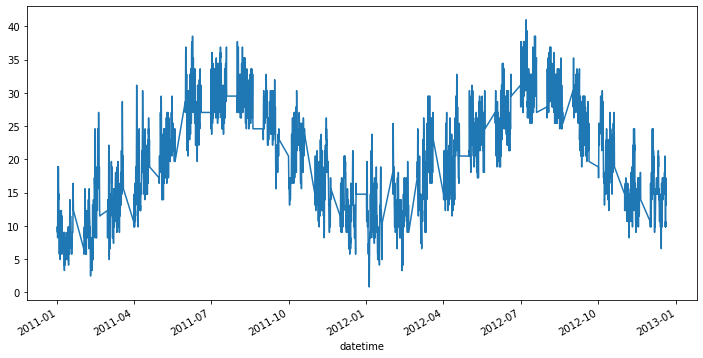

In [36]:
df['temp'].plot()

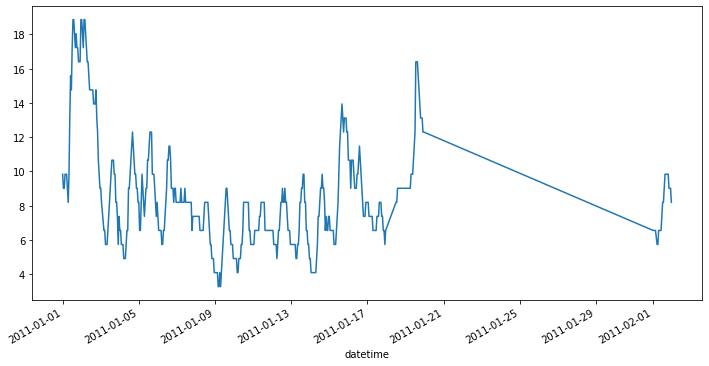

In [37]:
df['2011-01-01':'2011-02-01']['temp'].plot()

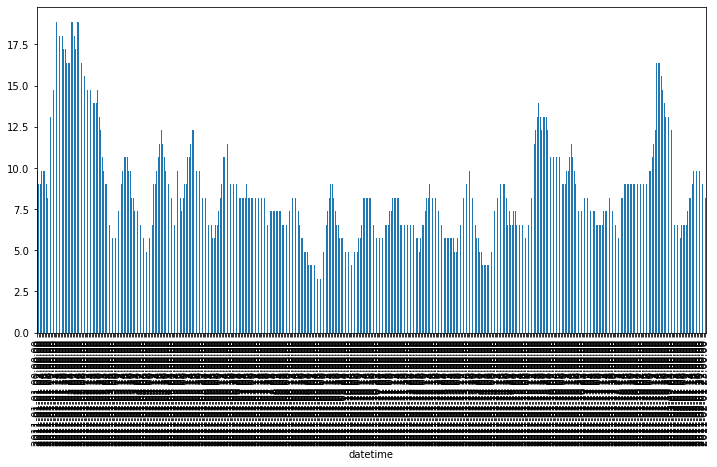

In [38]:
df['2011-01-01':'2011-02-01']['temp'].plot.bar()

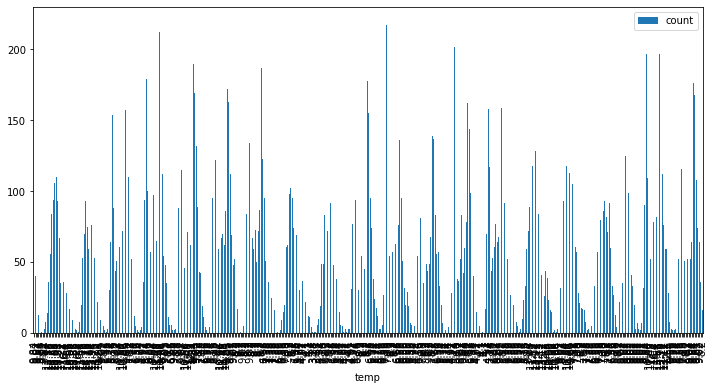

In [40]:
df['2011-01-01':'2011-02-01'].plot.bar(x='temp',y='count')

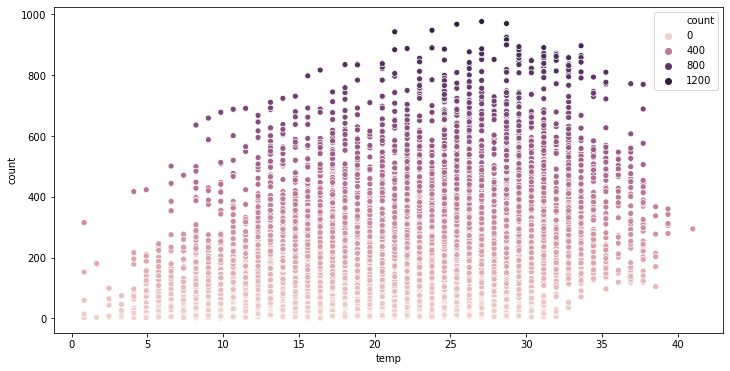

In [46]:
sns.scatterplot(x='temp', y='count', data=df, hue='count')

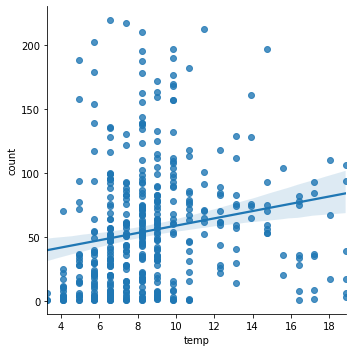

In [56]:
sns.lmplot(x='temp', y='count', data=df['2011-01-01':'2011-02-01'])

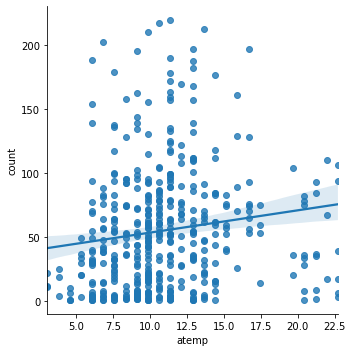

In [57]:
sns.lmplot(x='atemp', y='count', data=df['2011-01-01':'2011-02-01'])

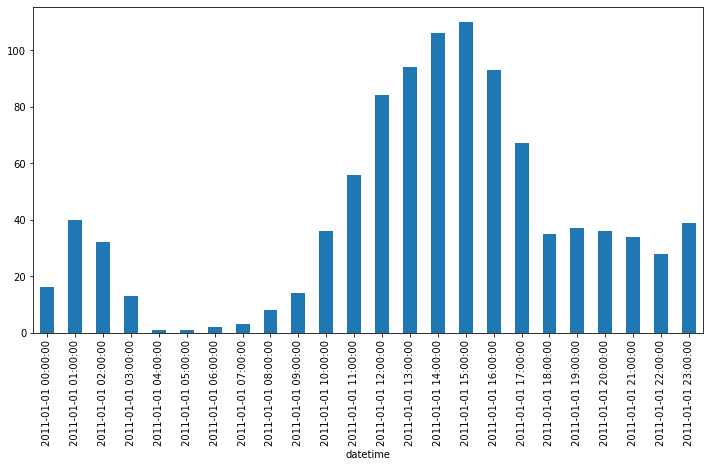

In [61]:
df['2011-01-01':'2011-01-01']['count'].plot.bar()          # daily rental, 2011-01-01

In [65]:
df.between_time(start_time='10:00:00', end_time='11:00:00')['count'].mean()

192.88351648351647

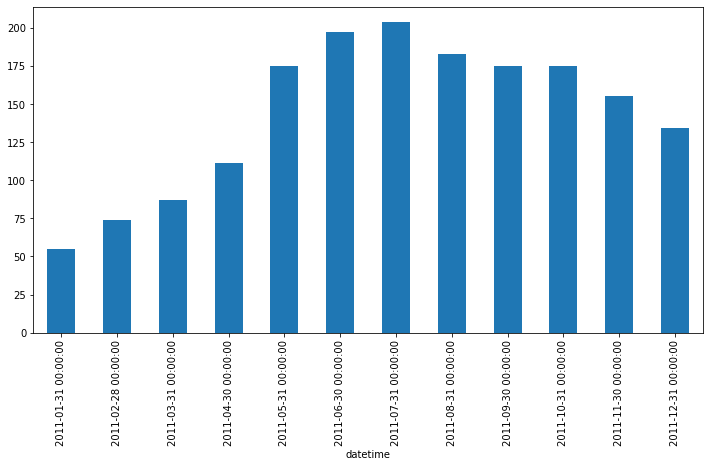

In [74]:
df['2011-01-01':'2011-12-31'].resample('M')['count'].mean().plot.bar()   # monthly means, 2011

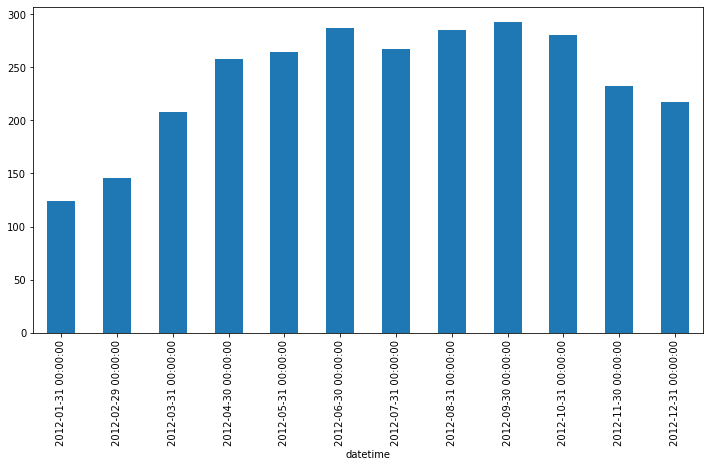

In [79]:
df['2012-01-01':'2012-12-31'].resample('M')['count'].mean().plot.bar()   # monthly means, 2012

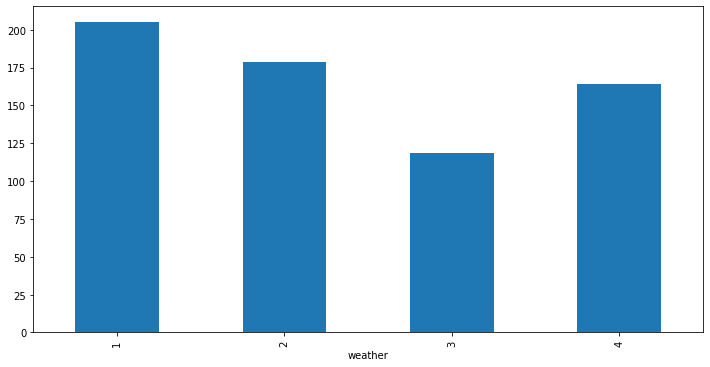

In [93]:
df.groupby('weather')['count'].mean().plot.bar()

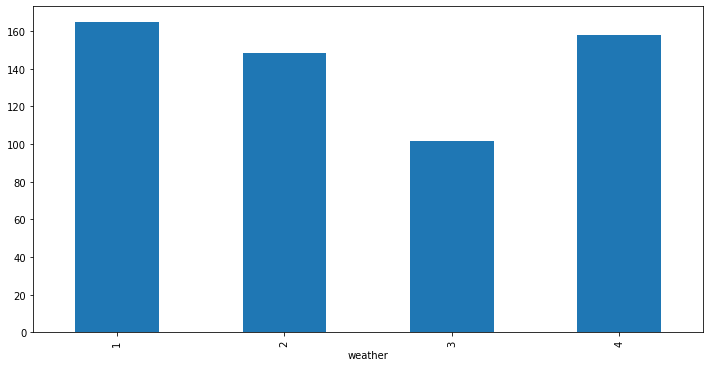

In [104]:
df.groupby('weather')['registered'].mean().plot.bar()

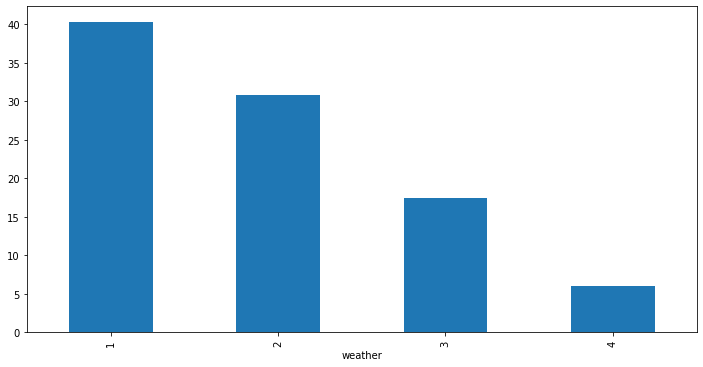

In [103]:
df.groupby('weather')['casual'].mean().plot.bar()

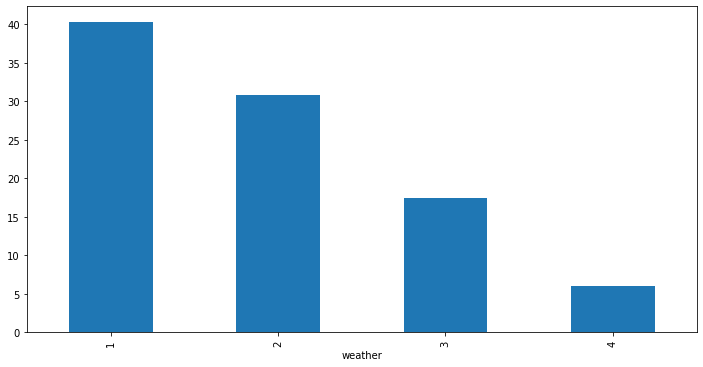

In [101]:
df.groupby('weather')['casual'].mean().plot.bar()

1

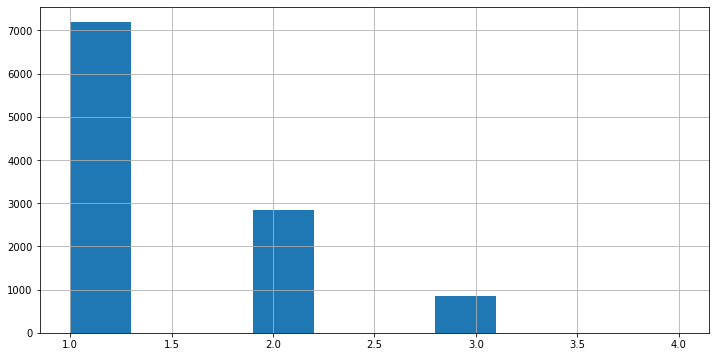

In [110]:
df['weather'].hist()  # weather distribution
len(df[df['weather']==4])

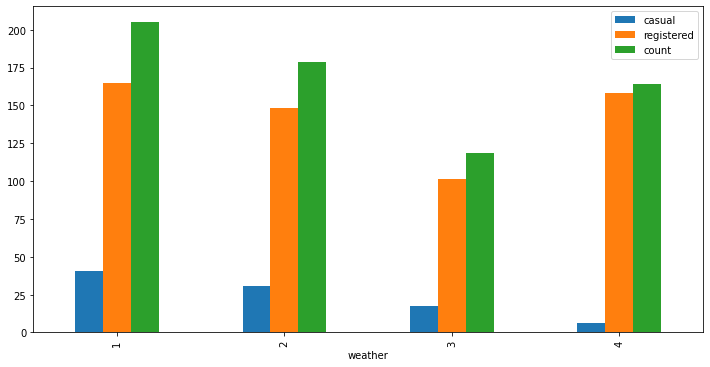

In [138]:
df.groupby('weather')[['casual','registered','count']].mean().plot.bar()

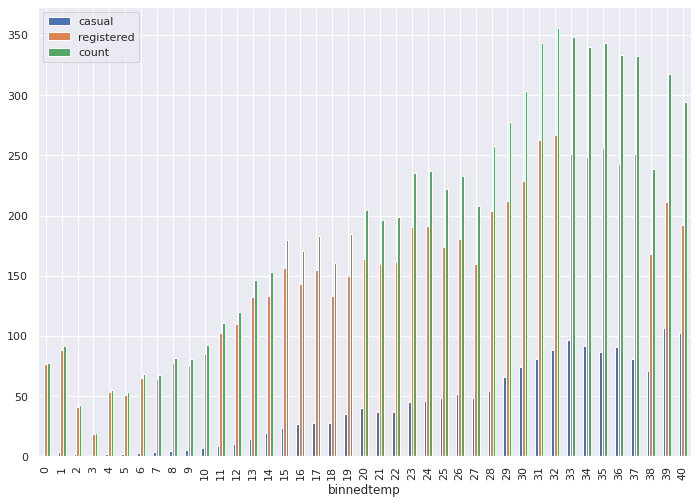

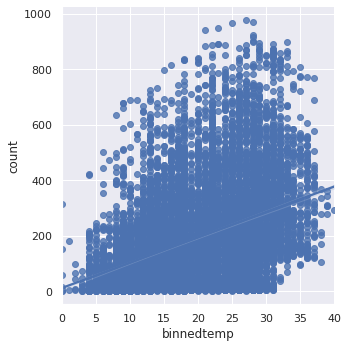

In [159]:
bins = list(range(42))
df['binnedtemp']=pd.cut(df['temp'], bins, labels=False)
#df.head(50)
df.groupby('binnedtemp')[['casual','registered','count']].mean().plot.bar()
sns.set(rc={'figure.figsize':(20,15)})
sns.lmplot(x='binnedtemp', y='count', data = df)  #, data=df['2011-01-01':'2011-02-01']

In [142]:
range(42)

range(0, 42)

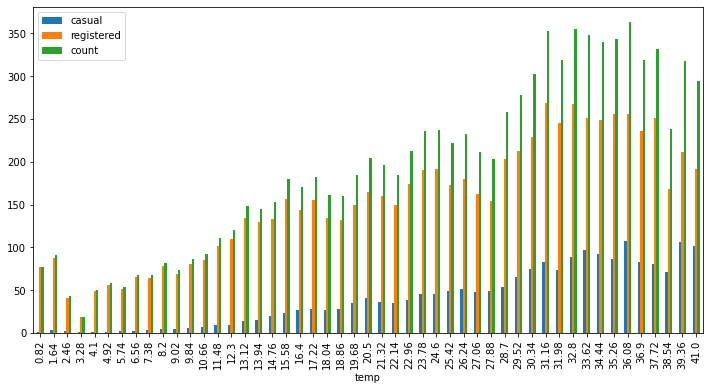

In [136]:
df.groupby('temp')[['casual','registered','count']].mean().plot.bar()

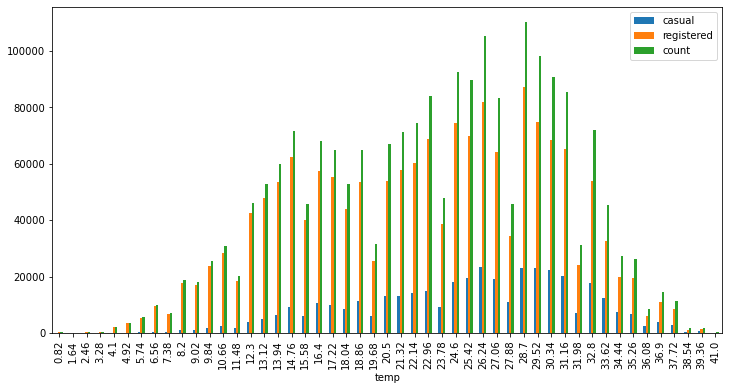

In [137]:
df.groupby('temp')[['casual','registered','count']].sum().plot.bar()

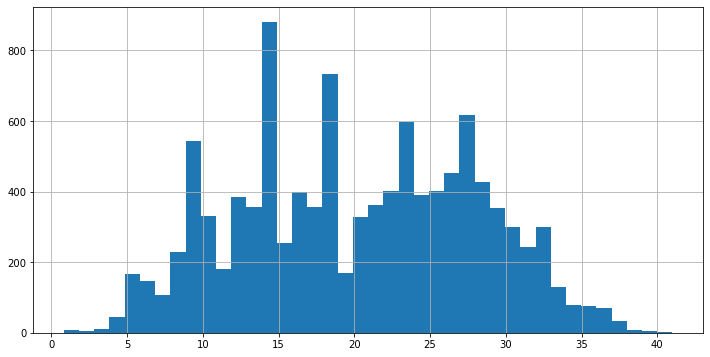

In [135]:
df['temp'].hist(bins=40)

In [109]:
df['casual','registered','count'].mean().plot.bar()

KeyError: ('casual', 'registered', 'count')

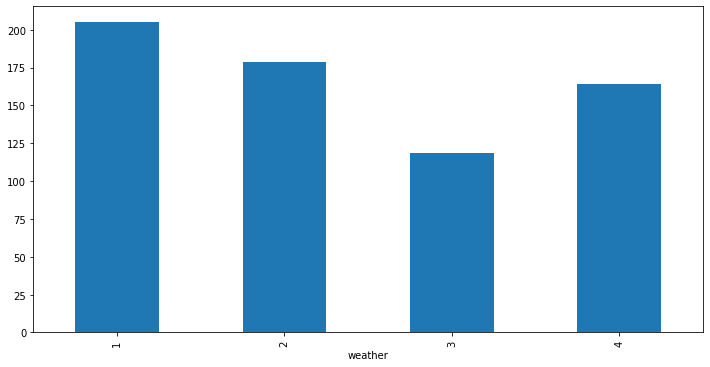

In [107]:
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df, kind="bar",
    x="species", y="body_mass_g", hue="sex",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")